In [1]:
import pandas as pd
import numpy as np
import spacy
nlp = spacy.load('en_core_web_sm')
from scipy.sparse import coo_matrix, csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('mishnah.csv')
df.drop(columns='Unnamed: 0',inplace=True)

# Topic Modeling the Mishnah
### ***What is the Mishnah?***  
Good question. The mishnah is not easily defined, and to do it justice it is a good idea to put it in its historical context.  
Before the first century CE, the jewish faith was extremely different. It was still, in practice, the simple bronze-age city-cult of Jerusalem. A sacrificial state religion centered on a single temple in what is now Israel/Palestine. Its practice was primarily based on adherence to certain already-established dietary, moral, and practical restrictions, as well as tithing to the ruling dynasty and a small tribe of priests who administered the temple.  
This all changed in 70 CE, when after decades of rebellion and a multi-year siege, soldiers of the Roman Empire entered the city of Jerusalem and sacked it. In the process they destroyed the temple and initiated the modern Jewish diaspora.  
In the absence of temple, the priestly elite, and the the ruling authority, the religion needed to be reformed. An already active movement turning the religion towards legalism, in a very similar path that Christianity and Islam would follow in the next millenium, came to the forefront of Jewish thought. This movement re-focussed the religion from a sacrificial system to a devotional once. Rather than the burnt animal sacrifices of Jerusalem, Judaism came to be marked by the legal interpretation of the original 'Old Testament', endogamy (marriage only within the cultural group), prayer, and practice. This process had been started some hundreds of years earlier. Already, there was developping an oral tradition of laws, philosophy, and theology that came to descrive the religion. This oral collection eventually became what is now known as the Mishnah. In summary, it became a kind of civil and religious common law.  
Some time around 200 CE, a rabbi named Yehuda HaNasi (literally "The Prince") in Roman Judea compiled and editted this oral tradition. In doing so, it was organized into collections known as Sedarim ("orders"), Masekhot ('tractates'), Chapters, and individual mishnahs, usually of the length of what we might call paragraphs. **These will be my documents.**

## The "Orders" of the Mishnah are as follows:  
### Zeraim ("Seeds")  
Covers prayers, blessings, agricultural laws and tithes. (11 tractates)  
- **Berakhot** ("Blessings"), consists of nine chapters and deals with the rules for daily prayer, particularly the Shema and the Amidah, and other blessings and prayers said before and after eating, and on other occasions.  
- **Pe'ah** ("Corner"), has eight chapters and deals with the commandments concerning the gifts to the poor from the produce of the land, namely from the corners of the field which must be left to the poor, gleanings, and forgotten produce assigned to them, as specified in the Torah Lev 19:9-10, Lev 23:22 and (Deut 24:19-22), and with the topic of charity and rights of the poor in general.  
- **Demai** ("Doubtfully Tithed Produce"), has seven chapters and deals with cases in which it is uncertain that tithes have been set aside from produce for the Kohanim (priests) and Levites.  
- **Kil'ayim** ("Mixed Species"), has nine chapters and deals with rules regarding forbidden mixtures in agriculture, clothing and animal breeding, as specified in Leviticus 19:19 and Deuteronomy 22:9-11.  
- **Shevi'it** ("Seventh Year") has ten chapters which deal with the agricultural and fiscal regulations concerning the Sabbatical Year, and the remission of debts, as specified in Exodus 23:11, Leviticus 25:1-8 and Deuteronomy 15:1-11.    
- **Terumot** ("Donations") comprises eleven chapters dealing with the laws regarding the terumah donation given to the Kohanim, as specified in Numbers 18:8-20, Deuteronomy 18:4.  
- **Ma'aserot** or **Ma'aser Rishon** ("Tithes" or "First Tithes") has five chapters concerning the rules regarding the tithe to be given to the Levites as specified in Numbers 18:21-24.  
- **Ma'aser Sheni** ("Second Tithe"), comprising five chapters, deals with the rules concerning the tithe or its equivalent which was to be eaten in Jerusalem in the first, second, fourth and sixth years of the seven-year agricultural cycle culminating in the Sabbatical Year and as mandated by the Torah, as stated in Deuteronomy 14:22-26.  
- **Hallah** ("Dough") comprises four chapters that deal with the laws regarding the offering of dough to be given to the Kohanim as specified in Numbers 15:18-21.  
- **Orlah** ("First Fruits of Trees") with three chapters deals chiefly with the prohibitions on the use of a tree for the first three years after it has been planted, as specified in Leviticus 19:23-25 and the requirements regarding the fruit of the fourth year.  
- **Bikkurim** ("First Fruits") has three chapters with the laws concerning the first-fruit gifts to the Kohanim and the Temple and a description of the donation ceremony, as specified in Exodus 23:19 and Deuteronomy 26:1.  

### Moed ("Festival")  
Pertaining to the laws of the Sabbath and the Festivals. (12 tractates)  
- **Shabbat** ("Sabbath") deals with the 39 prohibitions of "work" on the Shabbat.  
- **Eruvin** ("Mixtures") deals with the Eruv or Sabbath-bound - a category of constructions/delineations that alter the domains of the Sabbath for carrying and travel.  
- **Pesahim** ("Passover Festivals") deals with the prescriptions regarding the Passover and the paschal sacrifice.  
- **Shekalim** ("Shekels") deals with the collection of the half-Shekel as well as the expenses and expenditure of the Temple.  
- **Yoma** ("The Day") called also "Kippurim" or "Yom ha-Kippurim" ("Day of Atonement"); deals with the prescriptions Yom Kippur, especially the ceremony by the Kohen Gadol.  
- **Sukkah** ("Booth") deals with the festival of Sukkot (the Feast of Tabernacles) and the Sukkah itself. Also deals with the Four Species (Lulav, Etrog, Hadass, Aravah — Palm branch, Citron, Myrtle, Willow) which are waved on Sukkot.  
- **Beitza** ("Egg") (So called from the first word, but originally termed, according to its subject, Yom Tov - "Holidays") deals chiefly with the rules to be observed on Yom Tov.  
- **Rosh Hashanah** ("New Year") deals chiefly with the regulation of the calendar by the new moon, and with the services of the festival of Rosh Hashanah.  
- **Ta'anit** ("Fasting") deals chiefly with the special fast-days in times of drought or other untoward occurrences.  
- **Megillah** ("Scroll") contains chiefly regulations and prescriptions regarding the reading of the scroll of Esther at Purim, and the reading of other passages from the Torah and Neviim in the synagogue.  
- **Mo'ed Katan** ("Little Festival") deals with Chol HaMoed, the intermediate festival days of Pesach and Sukkot.  
- **Hagigah** ("Festival Offering") deals with the Three Pilgrimage Festivals (Passover, Shavuot, Sukkot) and the pilgrimage offering that men were supposed to bring in Jerusalem.  

### Nashim ("Women")  
Concerning marriage and divorce, i.e. family law, some forms of oaths and the laws of the nazirite (sort of a monk).  
- **Yevamot** ("Brothers-in-Law") deals with the Jewish law of yibbum (levirate marriage) (Deut. 25:5–10) and other topics such as the status of minors. It consists of 16 chapters.  
- **Ketubot** ("Prenuptial agreements") deals with the ketubah (Judaism's prenuptial agreement), as well as topics such as virginity, droit du seigneur and the obligations of a couple towards each other. It consists of 13 chapters.  
- **Nedarim** ("Vows") deals with various types of vows often known as nedarim and their legal consequences. It consists of 11 chapters.  
- **Nazir** ("One who abstains") deals with the details of the Nazirite vow and being a Nazirite (Num 6). It consists of 9 chapters.  
- **Sotah** ("Wayward wife") deals with the ritual of the sotah, the woman suspected of adultery (Num 5) as well as other rituals involving a spoken formula (such as breaking the heifer's neck, the King's septa-annual public Torah reading, the Blessings and Curses of Mount Gerizim and Mount Ebal, etc...). It consists of nine chapters.  
- **Gittin:** ("Documents") deals with the concepts of divorces and other documents. It consists of 9 chapters.  
- **Kiddushin:** ("Betrothal") deals with the initial stage of marriage – betrothal, as well as the laws of Jewish lineages. It consists of 4 chapters.  

### Nezikin ("Damages")  
Dealing with civil and criminal law, the functioning of the courts and oaths.  
- **Bava Kamma** (First Gate) deals with civil matters, largely damages and compensation.  
- **Bava Metzia** (Middle Gate) deals with civil matters, largely torts and property law.  
- **Bava Batra** (Last Gate) deals with civil matters, largely land ownership.  
- **Sanhedrin** (The Sanhedrin) deals with the rules of court proceedings in the Sanhedrin, the death penalty, and other criminal matters.  
- **Makkot** (Lashes) deals with collusive witnesses, cities of refuge and the punishment of lashes.  
- **Shevu'ot** (Oaths) deals with the various types of oaths and their consequences.  
- **Eduyot** (Testimonies) presents case studies of legal disputes in Mishnaic times and the miscellaneous testimonies that illustrate various Sages and principles of halakha.  
- **Avodah Zarah** (Foreign worship) deals with the laws of interactions between Jews and Gentiles and/or idolaters (from a Jewish perspective).  
- **Avot** (Fathers) is a collection of the Sages' favourite ethical maxims.  
- **Horayot** (Decisions) deals with the communal sin-offering brought for major errors by the Sanhedrin.  

### Kodashim ("Holy things") 
Regarding sacrificial rites, the Temple, and the dietary laws.  
- **Zevachim** (“Sacrifices”), with fourteen chapters, and originally called Shehitat Kodashim ("slaughtering of the holy animals") deals with the sacrificial system of the Temple period, namely the laws for animal and bird offerings, and the conditions which make them acceptable or not, as specified in the Torah, primarily in the book of Leviticus (Lev 1:2 and on).  
- **Menachot** ("Meal Offerings"), comprising thirteen chapters, deals with the rules regarding the preparation and presentation of grain-meal and drink offerings, including the meal-offering that was burnt on the altar and the remainder that was consumed by the priests as specified in the Torah (Lev 2:1 and on); the bringing of the omer of barley (Lev 23:10), the two loaves (Lev 23:17), and the showbread (Lev 24:5).  
- **Chullin** ("Ordinary or Mundane"), also called also Shehitat Hullin ("slaughtering of non-consecrated animals"), has twelve chapters and deals with the laws for slaughtering animals and birds for meat for ordinary use, as opposed to sacred use, with other rules relating to the eating of meat, and with the dietary laws in general.  
- **Bekhorot** ("Firstborns"), consists of nine chapters and deals mainly with the sanctification and redemption of human and animal firstborns, as specified in the Torah (Ex 13:2, 12-13, Num 18:15-17 and Deut 15:19-23), and the tithing of cattle (Lev 27:32-33).  
- **Arakhin** ("Dedications" or “Estimations”), with nine chapters, deals with the rules for determining the amount which must be paid in fulfilment of a vow to dedicate to the Temple the 'market-value' or 'worth' of a person, field or object in accordance with the Torah (Lev 27:1-34), or voluntary contributions to the upkeep of the Temple, and also with laws relating to the Jubilee year (Lev 25:8).  
- **Temurah** ("Substitution"), comprising seven chapters, outlines the rules about the substitution of one sacrificial animal for another in accordance with the Torah’s instructions (Lev 27:10).  
- **Keritot** ("Excisions"), with six chapters, deals with the transgressions for which the penalty is karet, meaning, sins punishable by premature or sudden death, or being cut off from the community of Israel, if done deliberately, and the type of sin-offering sacrifice that had to be offered to effect atonement if the transgression was committed in error.  
- **Me'ilah** (“Sacrilege” or "Trespass"), with six chapters, deals with laws concerning disrespectful treatment of property belonging to the Temple or using holy objects in a prohibited manner, and with restitution for the misappropriation of Temple property, in accordance with Lev 5:15-16.  
- **Tamid** ("The Daily Sacrifice", lit. “The Continual [Offering]”), with seven chapters (in most editions), outlines the Temple service for the daily morning and evening sacrifice, known as the Korban Tamid, in accordance with the Torah (Ex 29:38-42 and Num 28:2-8).  
- **Middot** ("Measurements" or “Dimensions”), comprises five chapters containing descriptions of the Second Temple’s architecture including its courts, gates and halls; its furnishings such as the Altar; and an account of the service of the priestly workshifts in the Temple.  
- **Kinnim** ("Nests"), with three chapters, deals with the instructions regarding the offering of birds, in penitence for certain offences and certain conditions of uncleanness, as described in the Torah (Lev 1:14, Lev 5:7and Lev 12:8); and discusses the case in which birds belonging to different persons or to different offerings have become mixed up with one another; the name of the tractate (nests) refers to the pairs of birds prescribed in the Torah as offerings (Lev 5:1-10).  

### Tohorot ("Purities") 
Pertaining to the laws of purity and impurity, including the impurity of the dead, the laws of food purity and bodily purity.

##### For the purposes of this study I will use the english translation supplied by Sefaria.org. Some terms are left as hebrew to english transliteration, and I will attempt to retain these and use them to make sense as best I can.


In [4]:
from nltk.corpus import stopwords
default_stop = list(set(stopwords.words('english')))
my_stop = ['say','rabbi','forget','may','give','poor','sheaf','tithe','take','shall','produce','buy',
          'one','two',
          'bet','terumah','meir','hillel','shammai','elazar']
final_stop = default_stop + my_stop

In [11]:
tfidf.shape

(4083, 109257)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
#Setting up the vectorizer
cv = TfidfVectorizer(stop_words=final_stop,ngram_range=(1,2),max_df = 0.05)
#Transforming the full corpus dataset using the vectorizer
X = cv.fit_transform(df.tokens)
#Re-forming my TFIDF vectorizer as a dataframe with words as columns
tfidf = pd.DataFrame(X.toarray(), columns=cv.get_feature_names())
print('got tfidf\n')
#Inserting this dataframe into a sparse matrix
sparse_mtx = csr_matrix(tfidf.values)
print('got sparse matrix\n')
words = tfidf.columns
from sklearn.decomposition import NMF
#Setting up my non-negative factorization to default to 6 components, corresponding to the 6 super-topics
model = NMF(n_components=6, init='random', random_state=0, max_iter = 2000)
#Transforming by that model
doc_topics = model.fit_transform(sparse_mtx)
print('fit nmf\n')
#Getting the top words for each topic
t = model.components_.argsort(axis=1)[:,-1:-9:-1]
topic_words = [[words[e] for e in l] for l in t]
topic_words

got tfidf

got sparse matrix

fit nmf



[['domain',
  'sell',
  'field',
  'pay',
  'cubit',
  'public',
  'tree',
  'public domain'],
 ['susceptible',
  'susceptible impurity',
  'susceptible uncleanness',
  'midra',
  'midra uncleanness',
  'susceptible midra',
  'corpse uncleanness',
  'metal'],
 ['become unclean',
  'handbreadth',
  'remain clean',
  'hive',
  'touch',
  'oven',
  'size',
  'everything'],
 ['brother',
  'marry',
  'halitzah',
  'sister',
  'husband',
  'perform',
  'daughter',
  'perform halitzah'],
 ['vow',
  'nazirite',
  'beth',
  'annul',
  'benefit',
  'konam',
  'behold',
  'behold nazirite'],
 ['slaughter',
  'offer',
  'hatat',
  'defile',
  'burn',
  'outside',
  'sacrilege',
  'sprinkle']]

In [6]:
df.seder.unique()

array(['Zeraim', 'Moed', 'Nashim', 'Nezikin', 'Kadoshim', 'Toharot'],
      dtype=object)

In [89]:
predicted_topics = []
topic_assignments = ['Zeraim','Toharot','Moed','Nashim','Nezikin','Kadoshim']
for doc in doc_topics:
    predicted_topics.append(topic_assignments[np.argmax(doc)])

In [85]:
rights = (df.seder==predicted_topics).values

In [26]:
doc_topics.shape

(4083, 6)

In [43]:
from sklearn.manifold import TSNE
arr = pd.DataFrame(doc_topics)
topic_num = np.argmax(doc_topics, axis=0)
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4083 samples in 0.023s...
[t-SNE] Computed neighbors for 4083 samples in 0.441s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4083
[t-SNE] Computed conditional probabilities for sample 2000 / 4083
[t-SNE] Computed conditional probabilities for sample 3000 / 4083
[t-SNE] Computed conditional probabilities for sample 4000 / 4083
[t-SNE] Computed conditional probabilities for sample 4083 / 4083
[t-SNE] Mean sigma: 0.001127
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.718399
[t-SNE] KL divergence after 1000 iterations: 1.011105


In [53]:
topic_num = np.argmax(doc_topics, axis=1)
topic_num.shape

(4083,)

In [86]:
tsne_df = pd.DataFrame(tsne_lda,predicted_topics)
tsne_df.rename(columns={0: "one", 1: "two"},inplace=True)
tsne_df['rights']=rights

Text(0, 0.5, '')

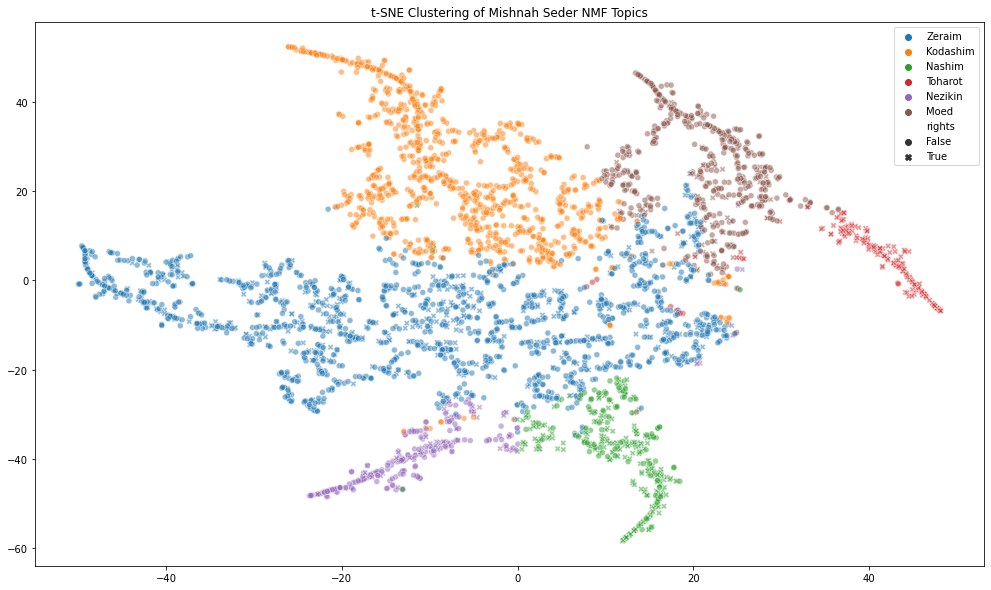

In [88]:
plt.figure(figsize=(17,10))
sns.scatterplot('one','two',style='rights',hue=tsne_df.index,data=tsne_df,alpha=0.5)
plt.title('t-SNE Clustering of Mishnah Seder NMF Topics')
plt.xlabel('')
plt.ylabel('')

Accuracy: 0.3575802106294391
Precision: 0.4616003185256108
Recall: 0.3575802106294391


Text(69.0, 0.5, 'Actual Seder')

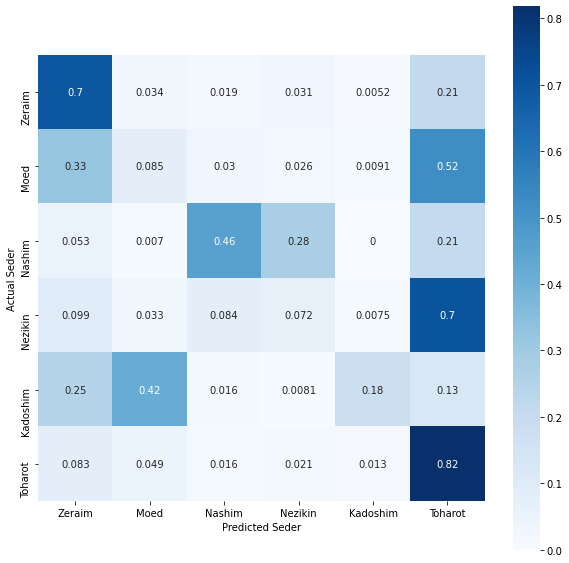

In [90]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
print('Accuracy: {}'.format(accuracy_score(df.seder,predicted_topics)))
print('Precision: {}'.format(precision_score(df.seder,predicted_topics,average='weighted')))
print('Recall: {}'.format(recall_score(df.seder,predicted_topics,average='weighted')))
c_mat = confusion_matrix(df.seder,predicted_topics,normalize='true')
plt.figure(figsize=(10,10))
sns.heatmap(c_mat, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=df.seder.unique(),
           yticklabels=df.seder.unique())
plt.xlabel('Predicted Seder')
plt.ylabel('Actual Seder')

In [18]:
models = []
score_type = []
score = []
split_type = []
dimensions = []

for n in [1,2,4,11,25,50,100]:
    print(n)
    training_accuracy = []
    training_precision = []
    training_recall = []
    testing_accuracy = []
    testing_precision = []
    testing_recall = []

    
    from sklearn.model_selection import train_test_split
    X = df.tokens
    y = df.seder
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train = cv.fit_transform(X_train)
    tfidf_train = pd.DataFrame(X_train.toarray(), columns=cv.get_feature_names())
    words_train = tfidf_train.columns
    X_train = csr_matrix(tfidf_train.values)

    X_test = cv.transform(X_test)
    tfidf_test = pd.DataFrame(X_test.toarray(), columns=cv.get_feature_names())
    words_test = tfidf_test.columns
    X_test = csr_matrix(tfidf_test.values)

    model = NMF(n_components=n, init='random', random_state=0, max_iter = 2000)
    X_train = model.fit_transform(X_train)
    X_test = model.transform(X_test)


    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier().fit(X_train,y_train)
    knn_train_preds = knn.predict(X_train)
    knn_test_preds = knn.predict(X_test)
    score.append(accuracy_score(y_train,knn_train_preds))
    models.append('KNN')
    score_type.append('accuracy')
    split_type.append('train')
    dimensions.append(n)
    score.append(accuracy_score(y_test,knn_test_preds))
    models.append('KNN')
    score_type.append('accuracy')
    split_type.append('test')
    dimensions.append(n)




    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(max_depth=5).fit(X_train,y_train)
    dtc_train_preds = dtc.predict(X_train)
    dtc_test_preds = dtc.predict(X_test)
    score.append(accuracy_score(y_train,dtc_train_preds))
    models.append('Decision Tree')
    score_type.append('accuracy')
    split_type.append('train')
    dimensions.append(n)
    score.append(accuracy_score(y_test,dtc_test_preds))
    models.append('Decision Tree')
    score_type.append('accuracy')
    split_type.append('test')
    dimensions.append(n)

    
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=200,max_depth=7).fit(X_train,y_train)
    rfc_train_preds = rfc.predict(X_train)
    rfc_test_preds = rfc.predict(X_test)
    score.append(accuracy_score(y_train,rfc_train_preds))
    models.append('Random Forest')
    score_type.append('accuracy')
    split_type.append('train')
    dimensions.append(n)
    score.append(accuracy_score(y_test,rfc_test_preds))
    models.append('Random Forest')
    score_type.append('accuracy')
    split_type.append('test')
    dimensions.append(n)
    

    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB().fit(X_train,y_train)
    gnb_train_preds = gnb.predict(X_train)
    gnb_test_preds = gnb.predict(X_test)
    score.append(accuracy_score(y_train,gnb_train_preds))
    models.append('Gaussian Naive Bayes\'')
    score_type.append('accuracy')
    split_type.append('train')
    dimensions.append(n)
    score.append(accuracy_score(y_test,gnb_test_preds))
    models.append('Gaussian Naive Bayes\'')
    score_type.append('accuracy')
    split_type.append('test')
    dimensions.append(n)


1
2
4
11
25
50
100


In [19]:
scores_ar = np.array([models,score_type,score,split_type,dimensions]).T
scores_df = pd.DataFrame(scores_ar)
scores_df.columns = ['model','score_type','score','split','features']
#scores
#scores_df.features = int(scores_df.features)
scores_df = scores_df.astype({'features': 'int32','score':'float64'})

Text(0.5, 1.1, 'Seder Classifier Accuracies')

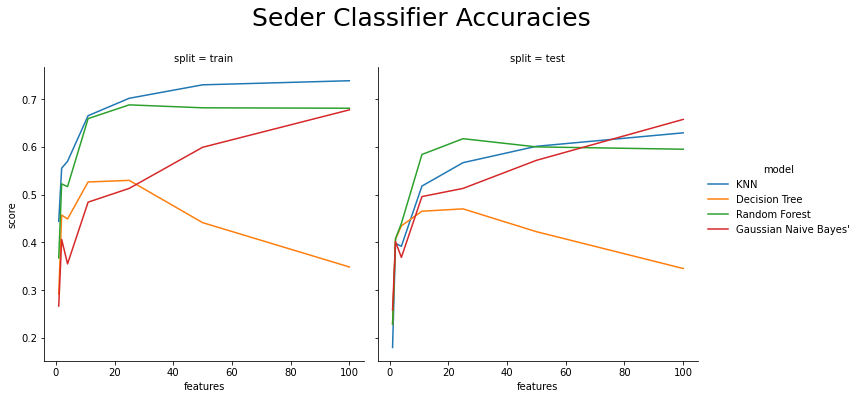

In [20]:
g = sns.FacetGrid(scores_df[scores_df.score_type=='accuracy'], col="split", col_order=["train", "test"],hue='model',
                 height = 5)
g = g.map(sns.lineplot, "features","score").add_legend()
g.fig.suptitle('Seder Classifier Accuracies', y = 1.1,fontsize=25)

In [21]:
scores_df[(scores_df.score_type=='accuracy')&(scores_df.split=='test')].sort_values(by='score',ascending=False).head()

,model,score_type,score,split,features
55,Gaussian Naive Bayes',accuracy,0.657283,test,100
49,KNN,accuracy,0.629131,test,100
37,Random Forest,accuracy,0.616891,test,25
41,KNN,accuracy,0.600979,test,50
45,Random Forest,accuracy,0.599755,test,50


In [23]:
scores_df[(scores_df.score_type=='accuracy')&(scores_df.split=='train')].sort_values(by='score',ascending=False).head()

,model,score_type,score,split,features
48,KNN,accuracy,0.738212,train,100
40,KNN,accuracy,0.729639,train,50
32,KNN,accuracy,0.701470,train,25
36,Random Forest,accuracy,0.687691,train,25
44,Random Forest,accuracy,0.681568,train,50
